In [1]:
from nltk.corpus import gutenberg, stopwords
from nltk.stem import PorterStemmer
from nltk.text import Text
from nltk import word_tokenize
from string import punctuation
import pandas as pd
import numpy as np
import re
import os
from ast import literal_eval

pd.options.mode.chained_assignment = None

os.chdir(os.path.dirname(os.getcwd()))

stopwords = stopwords.words('english')
punctuation = list(punctuation)
ps = PorterStemmer()

# Getting the tokens:

In [148]:
def get_tokens(text):
    tokens_raw_lower = word_tokenize(text.lower())
    try:
        tokens = []
        for token in tokens_raw_lower:
            if token.isdigit():
                continue
            elif token in punctuation or token in ["'s","’","--"] or token in stopwords:
                continue
            elif "." in token: # Try with and without!
                continue
            
            token = ps.stem(token)
            tokens.append(token)
        return tokens
    except: return []

In [149]:
character_data = pd.read_csv('ProjectA/descriptions.csv', sep=";", usecols=[1, 2, 3, 4, 5], converters={4: literal_eval})

ind_list = np.nonzero([r"(" in i for i in character_data["name"]])[0]
char_list = list([character_data["name"].iloc[i] for i in ind_list])
bool_list = [char.split(" ") for char in list(char_list)]

names = []
nicknames = []
for i in bool_list:
    for idx, el in enumerate(i):
        if r"(" in el:
            names.append(" ".join(i[:idx]))
            nicknames.append([" ".join(i[:idx]), " ".join(i[idx:])[1:-1]])

for i in range(len(ind_list)):
    character_data["name"].iloc[ind_list[i]] = names[i]
    
name_dict = dict(zip(names, nicknames))

def funcer(x):
    try: return name_dict[x]
    except: return [x]

character_data['nicknames'] = character_data["name"].apply(funcer)
character_data["name"].iloc[:4] = ["Rod", "Quasar", "Kane", "Flash Raktor"]
character_data["nicknames"].iloc[:4] = [["Hyper", "Rod"], ["Quick-Draw", "Quasar"], ["Steel Claw", "Kane"], ["The Trickster", "Flash Raktor"]]
character_data.set_index("name", inplace=True)
character_data = character_data.sort_index()
# ^^^ Above is just a way too complicated way to fix the dataset.

# Creating the tokens column:
character_data["tokens"] = character_data["description"].apply(get_tokens)
# Rearranging columns:
character_data = character_data[["nicknames", "description", "tokens", "properties", "referrals", "history"]]

character_data

,nicknames,description,tokens,properties,referrals,history
name,,,,,,
2BR-NTB,[2BR-NTB],"Loyal to Norath Kev, the droid 2BR-NTB has a d...","[loyal, norath, kev, droid, 2br-ntb, distinct,...",{'Appearances': ['Star Wars Resistance']},NaN,NaN
4-LOM,[4-LOM],"A rusty droid with insectile features, 4-LOM w...","[rusti, droid, insectil, featur, 4-lom, origin...",{'Appearances': ['Star Wars: The Empire Strike...,NaN,NaN
4D-M1N,[4D-M1N],When Captain Doza needs guests escorted into D...,"[captain, doza, need, guest, escort, doza, tow...",{'Appearances': ['Star Wars Resistance']},NaN,NaN
5-L,[5-L],A mouse droid serving aboard a First Order Sta...,"[mous, droid, serv, aboard, first, order, star...",{'Appearances': ['Star Wars Resistance']},NaN,NaN
8D8,[8D8],"A lanky smelter droid, during the time of the ...","[lanki, smelter, droid, time, empir, 8d8, assi...",{'Appearances': ['Star Wars: Return of the Jed...,NaN,NaN
...,...,...,...,...,...,...
Ziton Moj,[Ziton Moj],His gruff demeanor and devilish grin indicated...,"[gruff, demeanor, devilish, grin, indic, ziton...","{'Appearances': ['Star Wars: The Clone Wars'],...",NaN,NaN
Zorii Bliss,[Zorii Bliss],It is difficult for scoundrels to remain neutr...,"[difficult, scoundrel, remain, neutral, war, f...",{'Appearances': ['Star Wars: The Rise of Skywa...,NaN,NaN
Zuckuss,[Zuckuss],"A Gand bounty hunter, Zuckuss heeded the Empir...","[gand, bounti, hunter, zuckuss, heed, empir, c...",{'Appearances': ['Star Wars: The Empire Strike...,NaN,NaN


In [141]:
# Saving the dataset:
character_data.to_csv("ProjectA/descriptions_tokens.csv", sep=";")

# Grouping characters up:

In [150]:
from collections import defaultdict
from statistics import mode

star_wars_vocab = word_tokenize(" ".join(character_data["description"]))
star_wars_vocab_dict = defaultdict(list)
for v in star_wars_vocab: # This creates a dictionary of connections between stemmed words and the originals.
    star_wars_vocab_dict[ps.stem(v)].append(v)

# Choosing the most frequent and therefore most likely original version of the stemmed word.
token_beautifier = lambda token: mode(sorted(star_wars_vocab_dict[token]))

# We have the tokens, but unfortunately they are stemmed which is only relevant for getting the frequency of unique words.
# And we still want to be able to display some beautiful word clouds with actual words that match (as best as possible) the original words.

In [170]:
character_data["tokens"]

name
2BR-NTB        [loyal, norath, kev, droid, 2br-ntb, distinct,...
4-LOM          [rusti, droid, insectil, featur, 4-lom, origin...
4D-M1N         [captain, doza, need, guest, escort, doza, tow...
5-L            [mous, droid, serv, aboard, first, order, star...
8D8            [lanki, smelter, droid, time, empir, 8d8, assi...
                                     ...                        
Ziton Moj      [gruff, demeanor, devilish, grin, indic, ziton...
Zorii Bliss    [difficult, scoundrel, remain, neutral, war, f...
Zuckuss        [gand, bounti, hunter, zuckuss, heed, empir, c...
ferry droid    [burn, sulphur, atmospher, nevarro, lava, rive...
the Client     [mysteri, imperi, keep, low, profil, safehous,...
Name: tokens, Length: 894, dtype: object

In [ ]:
from itertools import chain

IDF_dict = defaultdict(int)

for word, count in chain(token_group_all.items()):
    IDF_dict[word] += count

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_scores = tfidf.fit_transform(character_data['description'])

# tfidf_scores_df = pd.DataFrame(tfidf_scores.toarray(), columns=tfidf.get_feature_names())

tfidf_scores_df = pd.DataFrame(tfidf_scores.toarray(), columns=tfidf.get_feature_names_out())

for i, row in tfidf_scores_df.iterrows():
    print(row['name'])
    print(tfidf_scores_df.loc[i, tfidf_scores_df.columns != 'name'].nlargest(1))

0.0
2br    0.295901
Name: 0, dtype: float64
0.0
glitches    0.258059
Name: 1, dtype: float64
0.0
doza    0.333557
Name: 2, dtype: float64
0.0
aboard    0.360034
Name: 3, dtype: float64
0.0
8d8    0.451048
Name: 4, dtype: float64
0.0
ap    0.30494
Name: 5, dtype: float64
0.0
echo    0.379579
Name: 6, dtype: float64
0.0
345211896246498721347    0.225968
Name: 7, dtype: float64
0.0
aayla    0.394725
Name: 8, dtype: float64
0.0
gallia    0.300262
Name: 9, dtype: float64
0.0
ackbar    0.394045
Name: 10, dtype: float64
0.0
coburn    0.376876
Name: 11, dtype: float64
0.0
garrick    0.356097
Name: 12, dtype: float64
0.0
its    0.229784
Name: 13, dtype: float64
0.0
vader    0.318119
Name: 14, dtype: float64
0.0
konstantine    0.555883
Name: 15, dtype: float64
0.0
kilian    0.381702
Name: 16, dtype: float64
0.0
star    0.304169
Name: 17, dtype: float64
0.0
ozzel    0.393485
Name: 18, dtype: float64
0.0
piett    0.304711
Name: 19, dtype: float64
0.0
raddus    0.326951
Name: 20, dtype: float64
0.0

# Collecting tokens from groups:

In [157]:
# There's the obvious "group" which is just the whole Star Wars universe, which is as easy as adding all the tokens together:

group_tokens = sum(character_data["tokens"], []) # All tokens collected.

tokens_beautified = list(map(token_beautifier, group_tokens))

unique, counts = np.unique(tokens_beautified, return_counts=True)
token_group_all = dict(sorted(dict(zip(unique, counts)).items(), key=lambda item: item[1])[::-1])

In [172]:
token_group_all

{'Jedi': 268,
 'Clone': 251,
 'Wars': 204,
 'Empire': 197,
 'Order': 194,
 'droid': 189,
 'Imperial': 172,
 'served': 146,
 'one': 132,
 'First': 124,
 'battle': 122,
 'Republic': 122,
 'Force': 122,
 'rebel': 111,
 'would': 102,
 'command': 101,
 'work': 99,
 'Senator': 94,
 'planet': 93,
 'pilot': 93,
 'hunter': 93,
 'help': 93,
 'Separatist': 89,
 'Resistance': 88,
 'world': 85,
 'Skywalker': 85,
 'leader': 83,
 'galaxy': 83,
 'power': 80,
 'known': 72,
 'used': 71,
 'bounty': 71,
 'General': 71,
 'Master': 69,
 'young': 68,
 'Death': 68,
 'time': 66,
 'new': 65,
 'make': 65,
 'living': 65,
 'part': 64,
 'mission': 64,
 'member': 64,
 'life': 64,
 'ship': 62,
 'friend': 62,
 'Anakin': 62,
 'Coruscant': 59,
 'operation': 58,
 'many': 58,
 'keep': 58,
 'Galactic': 58,
 'officer': 57,
 'Alliance': 57,
 'skills': 56,
 'fight': 56,
 'base': 54,
 'Star': 54,
 'even': 51,
 'Hutt': 51,
 'take': 50,
 'side': 49,
 'protecting': 48,
 'Council': 48,
 'survived': 47,
 'people': 47,
 'leading': 4

# TF-IDF:

In [ ]:
from collections import Counter
token_groups = [token_group_all]


# TF formula:
TF = lambda term_num, N: (term_num / N) * 100

communities_TFs = []
for token_group in token_groups:
    counts = Counter(token_group)
    TF_dict = dict([(token, TF(count, sum(counts.values()))) for token, count in counts.items()])
    communities_TFs.append(TF_dict)

# IDF formula:
IDF = lambda N, term_occurences: np.log10(N / term_occurences)

communities_IDFs = []
for i in range(len(token_groups)):
    papers = tokens_df["PaperIds"][i]
    counts = Counter(token_groups[i])
    IDF_dict = dict([(token, IDF(len(papers), count)) for token, count in counts.items()])
    communities_IDFs.append(IDF_dict)
    

communities_TF_IDFs = []
for idx, token_group in enumerate([list(i) for i in tokens_df["Tokens"]]):
    group_TF_IDF = []
    for token in token_group:
        # An error in some cases causes negative IDF values, so I just set them to 0.
        group_TF_IDF.append(communities_TFs[idx][token] * max(0,communities_IDFs[idx][token]))
    communities_TF_IDFs.append(dict(sorter(zip(token_group, group_TF_IDF))))
    
# Just a little teaser:
print("first 5 in first community:")
list(communities_TF_IDFs[0].items())[:5]

# Making wordclouds:

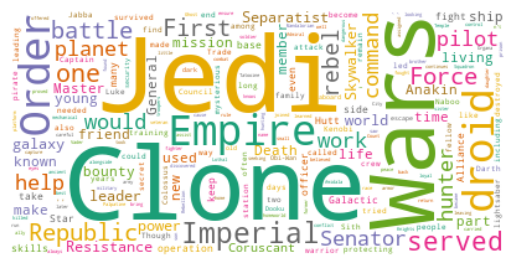

In [166]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

wordcloud = WordCloud(background_color="white", colormap="Dark2").generate_from_frequencies(token_group_all)
    
# Display the word cloud in the subplot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()